In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import data
CSV_FILE = 'static/df_non_temporal_unnormed.csv'
df = pd.read_csv(CSV_FILE)
print(df.head())

   Unnamed: 0       id        date  mood_class  average_mood  \
0           5  AS14.01  2014-03-26           3           6.6   
1           6  AS14.01  2014-03-27           3           7.0   
2           7  AS14.01  2014-03-28           3           6.4   
3           8  AS14.01  2014-03-29           4           8.0   
4           9  AS14.01  2014-03-30           4           7.5   

   last_5day_average_mood  last_5day_average_arousal  \
0                    6.43                       0.46   
1                    6.51                       0.38   
2                    6.63                       0.30   
3                    6.55                       0.14   
4                    6.95                       0.02   

   last_5day_average_valence  last_5day_average_activity  last_5day_total_sms  \
0                       0.40                    0.138201                  0.4   
1                       0.48                    0.131653                  0.4   
2                       0.54       

In [9]:
from sklearn.metrics import r2_score
#Split data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X = df.iloc[:, np.arange(5,len(df.columns)).tolist()]
t = df['average_mood']

X_train, X_test, y_train, y_test = train_test_split(X, t, test_size = 0.2, random_state = 32)

#Initiate model
# parameters = {
#     'n_estimators': [100, 150, 200, 250, 300],
#     'max_depth': [1,2,3,4,5],
# }
# regr = RandomForestRegressor(random_state=0)
#
# clf = GridSearchCV(regr, parameters)
# clf.fit(X_train, y_train)


rf = RandomForestRegressor(max_depth=2, n_estimators=250, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r_score  = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print(MSE, r_score, MAE, MAPE)

rf_base = RandomForestRegressor(random_state=0)
rf_base.fit(X_train, y_train)
y_pred = rf_base.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r_score  = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print(MSE, r_score, MAE, MAPE)

0.34007555333217454 0.3551295616693245 0.4204187246820448 0.06516964879441783
0.3334519250000002 0.3676896591654729 0.41848333333333354 0.06463037430697086


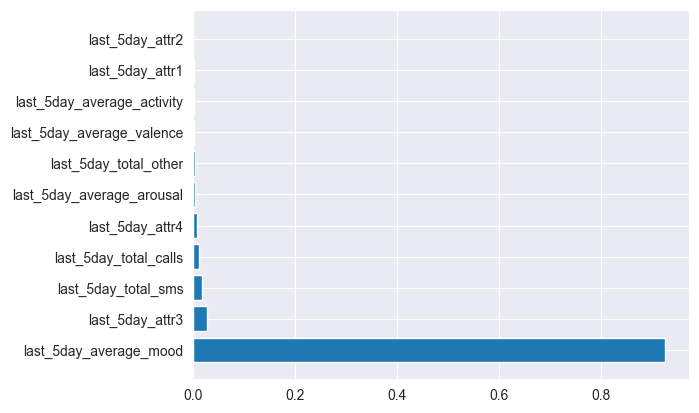

In [10]:
#Feature importance
feature_importance = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importance.index, feature_importance.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

X = df.iloc[:, np.arange(5,len(df.columns)).tolist()]
y = df['mood_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

#Initiate model
# rf = RandomForestClassifier(n_estimators = 100, random_state = 32)
#
# param_grid = {
#     'n_estimators': [200, 300, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }
#
# CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)
# CV_rfc.best_params_

# {'criterion': 'gini',
#  'max_depth': 7,
#  'max_features': 'sqrt',
#  'n_estimators': 500}

rfc=RandomForestClassifier(random_state=42, max_features='sqrt',
                           n_estimators= 500, max_depth=7, criterion='gini')
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
confusion_hard = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

rfc_base=RandomForestClassifier(random_state=42)
rfc_base.fit(X_train, y_train)
y_pred=rfc_base.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.68      0.82      0.75       116
           4       0.68      0.56      0.61        86
           5       0.00      0.00      0.00         5

    accuracy                           0.68       210
   macro avg       0.27      0.28      0.27       210
weighted avg       0.65      0.68      0.66       210

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.68      0.77      0.72       116
           4       0.62      0.56      0.59        86
           5       0.00      0.00      0.00         5

    accuracy                           0.65       210
   macro avg       0.26      0.27      0.26       210
weighted avg       0.63      0.65      0.64       210



/Users/chen/claire_data_mining/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chen/claire_data_mining/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chen/claire_data_mining/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

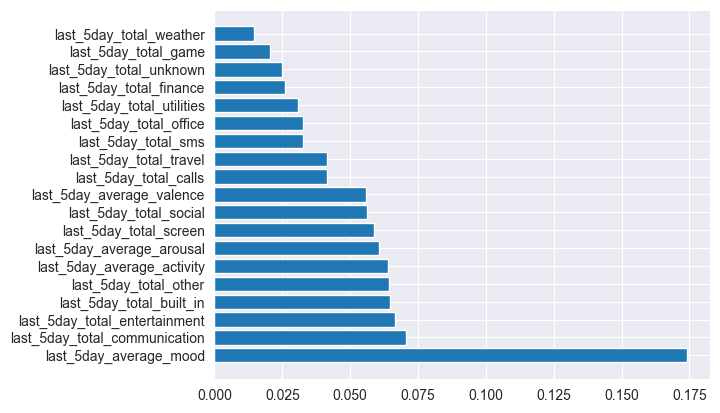

In [6]:
#Feature importance
feature_importance = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importance.index, feature_importance.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()